In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np                                      # necessary libraries

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()      # load data function returns 
                                                                                #(X_train, y_train), (X_test, y_test) 

In [3]:
X_train.shape                                           # checking the size of X_train and X_test

(60000, 28, 28)

In [4]:
X_test.shape                                            # 60 K training and 10 K test samples of 28*28 pixelsized images

(10000, 28, 28)

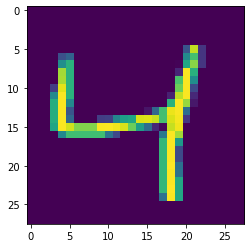

In [5]:
plt.imshow(X_train[2])                                  # We have to use matplotlib to print the images  

In [6]:
y_train[2]                                              # checking the content of y_train

4

In [9]:
y_train[:5]                                             # y_train has values corresponding to the X_train images
                                                        

array([5, 0, 4, 1, 9], dtype=uint8)

In [4]:
X_train = X_train/255
X_test = X_test/255                                     # normalizing the data 

In [5]:
# general ANN model
ann = models.Sequential([                      # Sequential model named "ann" (Sequence of layers) 
      layers.Flatten(input_shape=(28,28)),     # Input layer accepts shape of 28*28, Flatten 2D to 1D 
      layers.Dense(128, activation='relu'),    # Dense layer only accepts 1_Dimension data
      layers.Dense(128, activation='relu'),    # 2 deep layers 0f 128,128 neurons resp
      layers.Dense(10, activation='softmax')   # last o/p layer 10 neurons for 10 numbers 
      ])

ann.compile(optimizer='adam',                       # adam optimizer 
            loss='sparse_categorical_crossentropy', # loss function ensures convergence in weight updation 
            metrics=['accuracy'])                   # collect accuracy metrics

In [15]:
ann.fit(X_train, y_train, epochs=5)            # Use the X_train images and y_train values to train the model

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4100 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1039 - accuracy: 0.9680
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0684 - accuracy: 0.9789
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0510 - accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9877


In [16]:
ann.evaluate(X_test, y_test)                   # evaluating accuracy on test samples

313/313 [==============================] - 1s 1ms/step - loss: 0.0775 - accuracy: 0.9767


[0.07746652513742447, 0.9767000079154968]

In [17]:
ann.predict(X_test)        # the predicted values for each X_test digit, argmax can be used to get the result in exact digit  

array([[6.8178551e-08, 3.5479334e-05, 5.0247504e-06, ..., 9.9939263e-01,
        3.8519906e-07, 4.1415251e-06],
       [2.4692545e-13, 3.6144712e-09, 9.9999988e-01, ..., 8.6210607e-13,
        3.0463383e-09, 6.9197544e-21],
       [1.9809143e-08, 9.9992681e-01, 5.5238283e-06, ..., 1.3873084e-05,
        1.3764821e-05, 2.6553053e-08],
       ...,
       [1.5546208e-13, 1.4120585e-08, 6.2540720e-15, ..., 2.6095208e-09,
        1.2945740e-09, 8.5220584e-08],
       [7.4316178e-12, 1.0966620e-11, 4.9245390e-13, ..., 1.0294535e-13,
        9.3131683e-07, 1.0675485e-13],
       [2.5716956e-08, 2.4593760e-10, 1.9953221e-09, ..., 6.6225844e-13,
        2.0804637e-07, 1.6797706e-10]], dtype=float32)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report      
y_pred = ann.predict(X_test)                                                # storing the above matrix
y_pred_classes = [np.argmax(element) for element in y_pred]                 # applying argmax and storing the predicted values
print("Classification Report: \n", classification_report(y_test, y_pred_classes))     # comparing predicted and actual values

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



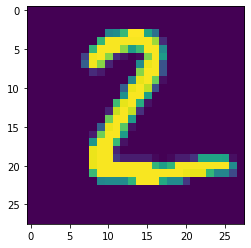

In [19]:
plt.imshow(X_test[1])                            # Checking the results of ANN : 1. This is the original test value 

In [20]:
y_pred_classes[1]                                 # 2. This is the predicted value, matching

2

In [21]:
X_train = X_train.reshape(-1,28,28,1)             # "-1" means maintain it as it is (i.e same as 60000) 
X_train.shape                                     # Adding one more parameter in X_train and X_test 

(60000, 28, 28, 1)

In [22]:
X_test = X_test.reshape(-1,28,28,1)               # Parameter (*1) added to staify the format needed for making CNN model
X_test.shape

(10000, 28, 28, 1)

In [24]:
#CNN model

cnn = models.Sequential([                             # Sequential model named "cnn"                 
  
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
  
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),    
    
    #dense
    layers.Flatten(),    
    layers.Dense(64, activation='relu'),     
    layers.Dense(10, activation='sigmoid')    
    
])

# In this cnn model there are 2 convolutional layers ,2 polling layers, a dense layer and an output layer
# convolution layer with 32 filter will dectect 32 useful features in the input image 
# classification is done based on these features
# filter size is 3 X 3 and max pooling is done to take a max value on every 2 X 2 window
# output layer of size 10 for 10 different classes     

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
cnn.fit(X_train,y_train,epochs=5)                     # Training the model with the data samples

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3134 - accuracy: 0.9053
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0489 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0310 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0171 - accuracy: 0.9951


In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0368 - accuracy: 0.9894


[0.03684111312031746, 0.9894000291824341]

In [29]:
cnn.predict(X_test)                                              # Use the model to predict every image on X_test

array([[1.9552559e-02, 2.3674989e-01, 7.4359870e-01, ..., 1.0000000e+00,
        1.3428730e-01, 5.4487288e-03],
       [8.0527902e-01, 9.8722267e-01, 1.0000000e+00, ..., 3.3396184e-03,
        1.6909897e-02, 2.3013353e-04],
       [6.9477856e-03, 9.9999881e-01, 8.8182092e-04, ..., 5.3133935e-01,
        3.9740208e-01, 1.8105298e-02],
       ...,
       [4.6747631e-05, 4.1756022e-01, 6.3967767e-05, ..., 1.3716927e-01,
        9.2420280e-01, 3.7995005e-01],
       [3.9768675e-01, 2.7439296e-03, 7.5842681e-06, ..., 3.1277537e-04,
        9.9718946e-01, 1.2571284e-01],
       [9.2343831e-01, 1.7428696e-03, 3.1167150e-02, ..., 9.4547831e-06,
        8.7278610e-01, 6.1493129e-02]], dtype=float32)

In [30]:
y_pred2 = cnn.predict(X_test)                                      
y_pred2_classes = [np.argmax(element) for element in y_pred2]     # Store the predictions 

print("Classification Report: \n", classification_report(y_test, y_pred2_classes))     # accuracy of both models are good

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [33]:
y_pred2_classes[1]                                  # checking the predictions with the actual value 

2

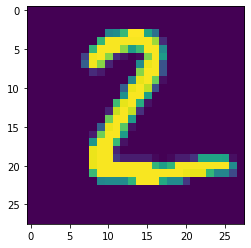

In [35]:
plt.imshow(X_test[1])                               

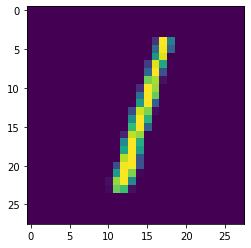

In [37]:
plt.imshow(X_test[2])

In [40]:
y_pred2_classes[2]

1